In [7]:
import uproot
import pandas as pd
import matplotlib.pyplot as plt
import mplhep as hep
import numpy as np
import awkward as awk
import hist

In [65]:

file = 'output.root'
f = uproot.open(file)['inclusive_jets']
# print(f.keys())
branches=['event', 'genJets', 'recJets']

event_tree=f['event']
genJet_tree=f['genJets']

# print(event_tree.keys())

df = {}
df_genJet_weight_tree=event_tree.arrays('genWgts', library='np')
# df['genJetPt']=genJet_tree.arrays('genJets.p4.fPt', library='pd')
# df_genJet_tree=genJet_tree.arrays('genJets.p4.fPt', library='pd')
df_genJet_tree=genJet_tree.arrays('genJets.p4.fPt',library='np')
df_genJet_eta_tree=genJet_tree.arrays('genJets.p4.fEta',library='np')
# awk_genJet_pT = awk.Array(df_genJet_tree['genJets.p4.fPt'])
# N=df_genJet_tree.shape[0]
# print('N=',N)
df_genJet_weight_tree=df_genJet_weight_tree['genWgts']
df_genJet_tree=df_genJet_tree['genJets.p4.fPt']
print(df_genJet_tree)
print(df_genJet_tree.shape)
print('\n WEIGHT ARRAY \n')
print(df_genJet_weight_tree)
print(df_genJet_weight_tree.shape)


[array([  14.048817,   17.2753  ,   19.109852, 2797.4106  , 2813.0989  ],
       dtype=float32)
 array([  22.277344, 2505.0198  , 2518.519   ], dtype=float32)
 array([  14.951621,   20.875956,   36.836918,   40.335155,   45.30452 ,
          67.194756,  175.31425 , 2373.331   , 2388.144   ], dtype=float32)
 ... array([  81.24026, 2693.8997 , 2718.5828 ], dtype=float32)
 array([  21.77561 ,   28.040745,   29.659508,   37.279896,   42.202435,
         126.33858 , 2480.9834  , 2554.7925  ], dtype=float32)
 array([  56.362946, 3004.136   , 3060.9512  ], dtype=float32)]
(2000,)

 WEIGHT ARRAY 

[array([0.6012982], dtype=float32) array([0.96347743], dtype=float32)
 array([0.94344234], dtype=float32) ... array([0.71685684], dtype=float32)
 array([0.8852059], dtype=float32) array([0.40232664], dtype=float32)]
(2000,)


In [9]:
first_event_jetpt=df_genJet_tree[0]
first_event_weight=df_genJet_weight_tree[0]
print(first_event_jetpt)
print()
print(first_event_weight)

[  14.048817   17.2753     19.109852 2797.4106   2813.0989  ]

[0.6012982]


In [10]:
first_event_broadcasted_weight=awk.broadcast_arrays(first_event_weight[:,np.newaxis], first_event_jetpt)
print(first_event_broadcasted_weight)

[<Array [... 0.601, 0.601, 0.601, 0.601]] type='1 * 5 * float32'>, <Array [... 17.3, 19.1, 2.8e+03, 2.81e+03]] type='1 * 5 * float32'>]


In [19]:
for i in first_event_broadcasted_weight[0]:
    print(i)

[0.601, 0.601, 0.601, 0.601, 0.601]


In [20]:
for i in first_event_broadcasted_weight[1]:
    print(i)

[14, 17.3, 19.1, 2.8e+03, 2.81e+03]


In [58]:
def broadcast_weights(jetpt_array, jet_weight_array):
    flattened_pT, flattened_weight= [], []
    for ind, (jetpt, jetweight) in enumerate(zip(jetpt_array, jet_weight_array)):
        # print('original', ind, jetpt, jetweight)
        # jet_weight_array[ind] = awk.broadcast_arrays(jetweight[:,np.newaxis], jetpt)
        broadcasted_weight_i = np.repeat(jetweight, len(jetpt))
        # print(broadcasted_weight_i)
        # print('broadcasted', ind, jetpt, broadcasted_weight_i) 
        flattened_pT.extend(jetpt)
        flattened_weight.extend(broadcasted_weight_i)
    
    return np.array(flattened_pT), np.array(flattened_weight)
        

In [59]:
flatpT, flatw = broadcast_weights(jetpt_array=df_genJet_tree, jet_weight_array=df_genJet_weight_tree)

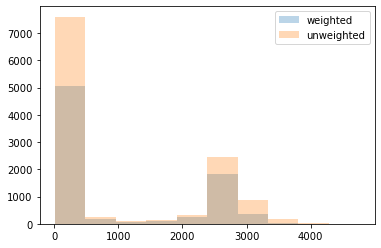

In [63]:
plt.hist(flatpT, weights=flatw, label='weighted', alpha=0.3)
plt.hist(flatpT, label='unweighted', alpha=0.3)
plt.legend()

In [70]:
file = 'RivetNtupliser_CMS_2021_I1972986_output_with_bias2SelectionRef_15.root'
f = uproot.open(file)['inclusive_jets']
# print(f.keys())
branches=['event', 'genJets', 'recJets']

event_tree=f['event']
genJet_tree=f['genJets']

# print(event_tree.keys())

df = {}
df_genJet_weight_tree=event_tree.arrays('genWgts', library='np')
# df['genJetPt']=genJet_tree.arrays('genJets.p4.fPt', library='pd')
# df_genJet_tree=genJet_tree.arrays('genJets.p4.fPt', library='pd')
df_genJet_tree=genJet_tree.arrays('genJets.p4.fPt',library='np')
df_genJet_eta_tree=genJet_tree.arrays('genJets.p4.fEta',library='np')
# awk_genJet_pT = awk.Array(df_genJet_tree['genJets.p4.fPt'])
# N=df_genJet_tree.shape[0]
# print('N=',N)
df_genJet_weight_tree=df_genJet_weight_tree['genWgts']
df_genJet_tree=df_genJet_tree['genJets.p4.fPt']
print(df_genJet_tree)
print(df_genJet_tree.shape)
print('\n WEIGHT ARRAY \n')
print(df_genJet_weight_tree)
print(df_genJet_weight_tree.shape)

flatpT, flatw = broadcast_weights(jetpt_array=df_genJet_tree, jet_weight_array=df_genJet_weight_tree)

[array([2797.4106, 2813.0989], dtype=float32)
 array([2505.0198, 2518.519 ], dtype=float32)
 array([ 175.31425, 2373.331  , 2388.144  ], dtype=float32) ...
 array([2760.4368, 2800.0708], dtype=float32)
 array([2573.0186, 2584.8647], dtype=float32)
 array([2806.6726, 2876.917 ], dtype=float32)]
(2000,)

 WEIGHT ARRAY 

[array([6.036296e-11], dtype=float32) array([9.672131e-11], dtype=float32)
 array([9.471003e-11], dtype=float32) ...
 array([6.588762e-11], dtype=float32)
 array([8.4863484e-11], dtype=float32)
 array([5.6822946e-11], dtype=float32)]
(2000,)


(array([3.655e+03, 1.044e+03, 2.590e+02, 7.200e+01, 4.700e+01, 1.800e+01,
        1.000e+01, 3.000e+00, 1.000e+00, 1.000e+00]),
 array([9.9626168e+09, 1.7577640e+10, 2.5192661e+10, 3.2807682e+10,
        4.0422703e+10, 4.8037728e+10, 5.5652749e+10, 6.3267770e+10,
        7.0882796e+10, 7.8497817e+10, 8.6112838e+10], dtype=float32),
 <BarContainer object of 10 artists>)

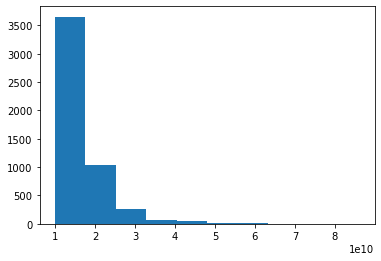

In [71]:
plt.hist(1/flatw)

In [ ]:
ptbins=[97,  133,  174,  220,  272,  330,  395,  468,  548,  638,  737,  846, 967, 1101, 1248, 1410, 1588, 1784, 2000, 2238, 2500, 2787]

In [67]:
plt.hist(df_genJet_tree[df_genJet_eta_tree<0.5] )

TypeError: '<' not supported between instances of 'dict' and 'float'

In [26]:
 h = hist.Hist(hist.axis.Regular(1000, 0, 3000, 
#                                 label='Number of muons in event')
#               )
                                ).fill(first_event_jetpt)
# plt.show()

SyntaxError: unexpected EOF while parsing (<ipython-input-26-d9e0f373eecd>, line 5)